In [1]:
# link: https://www.kaggle.com/nayuts/moa-pytorch-nn-pca-rankgauss

In [2]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import QuantileTransformer

In [4]:
train_features = pd.read_csv('../data/train_features.csv')
train_targets_scored = pd.read_csv('../data/train_targets_scored.csv')
train_targets_nonscored = pd.read_csv('../data/train_targets_nonscored.csv')

test_features = pd.read_csv('../data/test_features.csv')
sample_submission = pd.read_csv('../data/sample_submission.csv')

In [5]:
GENES = [col for col in train_features.columns if col.startswith('g-')]
CELLS = [col for col in train_features.columns if col.startswith('c-')]

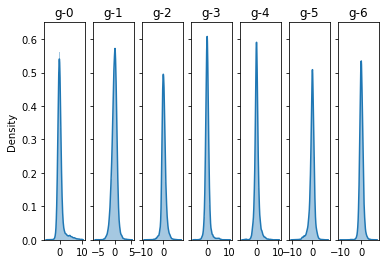

In [6]:
gnum = train_features[GENES].shape[1]
graphs = []

for i in range(0, gnum -1 , 7):
    #for least display.... 
    if i >= 3:
        break
    idxs = list(np.array([0, 1, 2, 3, 4, 5, 6]) + i)
    

    fig, axs = plt.subplots(1, 7, sharey=True)
    for k, item in enumerate(idxs):
        if item >=771:
            break
        graph = sns.distplot(train_features[GENES].values[:,item], ax=axs[k])
        graph.set_title(f"g-{item}")
        graphs.append(graph)

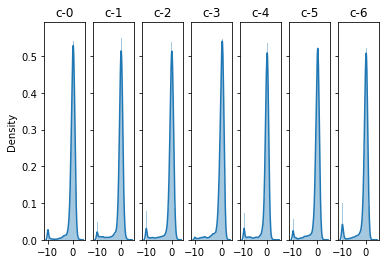

In [7]:
cnum = train_features[CELLS].shape[1]
graphs = []

for i in range(0, cnum -1 , 7):
    #for least display.... 
    if i >= 3:
        break
    idxs = list(np.array([0, 1, 2, 3, 4, 5, 6]) + i)
    

    fig, axs = plt.subplots(1, 7, sharey=True)
    for k, item in enumerate(idxs):
        if item >=100:
            break
        graph = sns.distplot(train_features[CELLS].values[:,item], ax=axs[k])
        graph.set_title(f"c-{item}")
        graphs.append(graph)

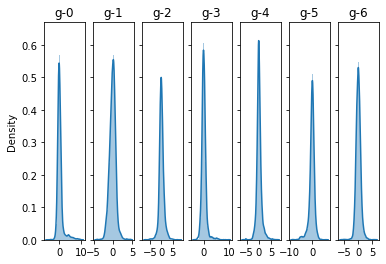

In [8]:
gnum = test_features[GENES].shape[1]
graphs = []

for i in range(0, gnum -1 , 7):
    #for least display.... 
    if i >= 3:
        break
    idxs = list(np.array([0, 1, 2, 3, 4, 5, 6]) + i)
    

    fig, axs = plt.subplots(1, 7, sharey=True)
    for k, item in enumerate(idxs):
        if item >=771:
            break
        graph = sns.distplot(test_features[GENES].values[:,item], ax=axs[k])
        graph.set_title(f"g-{item}")
        graphs.append(graph)

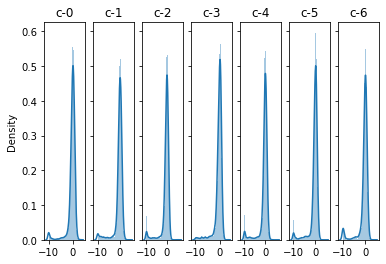

In [9]:
cnum = test_features[CELLS].shape[1]
graphs = []

for i in range(0, cnum -1 , 7):
    #for least display.... 
    if i >= 3:
        break
    idxs = list(np.array([0, 1, 2, 3, 4, 5, 6]) + i)
    

    fig, axs = plt.subplots(1, 7, sharey=True)
    for k, item in enumerate(idxs):
        if item >=100:
            break
        graph = sns.distplot(test_features[CELLS].values[:,item], ax=axs[k])
        graph.set_title(f"c-{item}")
        graphs.append(graph)

In [10]:
for col in (GENES + CELLS):
    transformer = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution="normal")
    vec_len = len(train_features[col].values)
    vec_len_test = len(test_features[col].values)
    raw_vec = train_features[col].values.reshape(vec_len, 1)
    transformer.fit(raw_vec)

    train_features[col] = transformer.transform(raw_vec).reshape(1, vec_len)[0]
    test_features[col] = transformer.transform(test_features[col].values.reshape(vec_len_test, 1)).reshape(1, vec_len_test)[0]

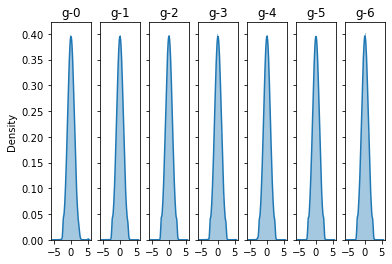

In [11]:
gnum = train_features[GENES].shape[1]
graphs = []

for i in range(0, gnum -1 , 7):
    #for least display.... 
    if i >= 3:
        break
    idxs = list(np.array([0, 1, 2, 3, 4, 5, 6]) + i)
    

    fig, axs = plt.subplots(1, 7, sharey=True)
    for k, item in enumerate(idxs):
        if item >=771:
            break
        graph = sns.distplot(train_features[GENES].values[:,item], ax=axs[k])
        graph.set_title(f"g-{item}")
        graphs.append(graph)

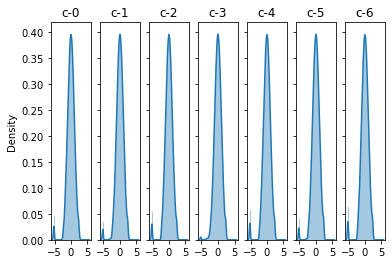

In [12]:
cnum = train_features[CELLS].shape[1]
graphs = []

for i in range(0, cnum -1 , 7):
    #for least display.... 
    if i >= 3:
        break
    idxs = list(np.array([0, 1, 2, 3, 4, 5, 6]) + i)
    

    fig, axs = plt.subplots(1, 7, sharey=True)
    for k, item in enumerate(idxs):
        if item >=100:
            break
        graph = sns.distplot(train_features[CELLS].values[:,item], ax=axs[k])
        graph.set_title(f"c-{item}")
        graphs.append(graph)

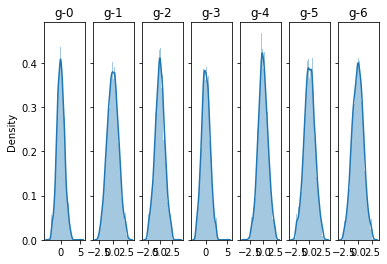

In [13]:
gnum = test_features[GENES].shape[1]
graphs = []

for i in range(0, gnum -1 , 7):
    #for least display.... 
    if i >= 3:
        break
    idxs = list(np.array([0, 1, 2, 3, 4, 5, 6]) + i)
    

    fig, axs = plt.subplots(1, 7, sharey=True)
    for k, item in enumerate(idxs):
        if item >=771:
            break
        graph = sns.distplot(test_features[GENES].values[:,item], ax=axs[k])
        graph.set_title(f"g-{item}")
        graphs.append(graph)

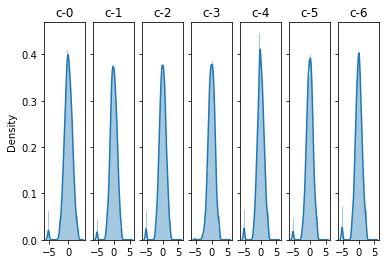

In [14]:
cnum = test_features[CELLS].shape[1]
graphs = []

for i in range(0, cnum -1 , 7):
    #for least display.... 
    if i >= 3:
        break
    idxs = list(np.array([0, 1, 2, 3, 4, 5, 6]) + i)
    

    fig, axs = plt.subplots(1, 7, sharey=True)
    for k, item in enumerate(idxs):
        if item >=100:
            break
        graph = sns.distplot(test_features[CELLS].values[:,item], ax=axs[k])
        graph.set_title(f"c-{item}")
        graphs.append(graph)

In [15]:
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    
seed_everything(seed=42)

In [16]:
train_targets_scored.sum()[1:].sort_values()

atp-sensitive_potassium_channel_antagonist      1
erbb2_inhibitor                                 1
diuretic                                        6
autotaxin_inhibitor                             6
protein_phosphatase_inhibitor                   6
                                             ... 
serotonin_receptor_antagonist                 404
dopamine_receptor_antagonist                  424
cyclooxygenase_inhibitor                      435
proteasome_inhibitor                          726
nfkb_inhibitor                                832
Length: 206, dtype: object

In [17]:
train_features['cp_type'].unique()

array(['trt_cp', 'ctl_vehicle'], dtype=object)

In [18]:
# GENES
n_comp = 50

data = pd.concat([pd.DataFrame(train_features[GENES]), pd.DataFrame(test_features[GENES])])
data2 = (PCA(n_components=n_comp, random_state=42).fit_transform(data[GENES]))
train2 = data2[:train_features.shape[0]]; test2 = data2[-test_features.shape[0]:]

train2 = pd.DataFrame(train2, columns=[f'pca_G-{i}' for i in range(n_comp)])
test2 = pd.DataFrame(test2, columns=[f'pca_G-{i}' for i in range(n_comp)])

# drop_cols = [f'c-{i}' for i in range(n_comp,len(GENES))]
train_features = pd.concat((train_features, train2), axis=1)
test_features = pd.concat((test_features, test2), axis=1)

In [19]:
#CELLS
n_comp = 15

data = pd.concat([pd.DataFrame(train_features[CELLS]), pd.DataFrame(test_features[CELLS])])
data2 = (PCA(n_components=n_comp, random_state=42).fit_transform(data[CELLS]))
train2 = data2[:train_features.shape[0]]; test2 = data2[-test_features.shape[0]:]

train2 = pd.DataFrame(train2, columns=[f'pca_C-{i}' for i in range(n_comp)])
test2 = pd.DataFrame(test2, columns=[f'pca_C-{i}' for i in range(n_comp)])

# drop_cols = [f'c-{i}' for i in range(n_comp,len(CELLS))]
train_features = pd.concat((train_features, train2), axis=1)
test_features = pd.concat((test_features, test2), axis=1)

In [20]:
from sklearn.feature_selection import VarianceThreshold

var_thresh = VarianceThreshold(threshold=0.5)
data = train_features.append(test_features)
data_transformed = var_thresh.fit_transform(data.iloc[:, 4:])

train_features_transformed = data_transformed[ : train_features.shape[0]]
test_features_transformed = data_transformed[-test_features.shape[0] : ]


train_features = pd.DataFrame(train_features[['sig_id','cp_type','cp_time','cp_dose']].values.reshape(-1, 4),\
                              columns=['sig_id','cp_type','cp_time','cp_dose'])

train_features = pd.concat([train_features, pd.DataFrame(train_features_transformed)], axis=1)


test_features = pd.DataFrame(test_features[['sig_id','cp_type','cp_time','cp_dose']].values.reshape(-1, 4),\
                             columns=['sig_id','cp_type','cp_time','cp_dose'])

test_features = pd.concat([test_features, pd.DataFrame(test_features_transformed)], axis=1)

train_features

,sig_id,cp_type,cp_time,cp_dose,0,1,2,3,4,5,...,927,928,929,930,931,932,933,934,935,936
0,id_000644bb2,trt_cp,24,D1,1.134849,0.907687,-0.416385,-0.966814,-0.254723,-1.017473,...,1.139957,-0.239308,-0.263508,-0.099148,0.395422,0.378691,0.781529,0.192329,-0.722910,-0.579511
1,id_000779bfc,trt_cp,72,D1,0.119282,0.681738,0.272399,0.080113,1.205169,0.686517,...,-0.949883,-0.115807,-0.147291,-1.264570,0.920906,0.274386,0.499999,-0.191694,-0.715027,1.049961
2,id_000a6266a,trt_cp,48,D1,0.779973,0.946463,1.425350,-0.132928,-0.006122,1.492493,...,0.568908,1.146671,-0.171541,-0.106502,-0.203981,-0.072555,-0.727408,-0.543770,-0.508405,0.903201
3,id_0015fd391,trt_cp,48,D1,-0.734910,-0.274641,-0.438509,0.759097,2.346330,-0.858153,...,0.922099,-0.370973,-0.341828,-0.841270,0.151856,1.593118,0.444875,0.411802,-0.926889,-0.600642
4,id_001626bd3,trt_cp,72,D2,-0.452718,-0.477513,0.972316,0.970731,1.463427,-0.869555,...,-0.425185,0.312534,-0.289393,0.069264,0.406780,0.365925,-1.040790,-0.881826,-0.259002,-0.045294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,trt_cp,24,D2,0.209361,-0.022389,-0.235888,-0.796989,-0.674009,0.919312,...,-0.351534,-0.391907,1.389078,-1.271702,0.562215,0.190712,1.274383,-0.394370,-0.241150,1.578725
23810,id_fffb70c0c,trt_cp,24,D2,-1.911021,0.587228,-0.588417,1.296405,-1.002640,0.850589,...,-1.971099,1.032914,0.841200,-0.514988,0.035381,0.089331,1.027776,-1.013224,1.630890,-0.389712
23811,id_fffc1c3f4,ctl_vehicle,48,D2,0.525149,0.631225,0.288173,-1.139968,0.769550,0.001014,...,0.113127,-0.546562,-0.046116,-0.874908,-0.723859,-0.029314,0.892077,0.326856,0.115703,0.093926
23812,id_fffcb9e7c,trt_cp,24,D1,0.816407,0.417618,0.431631,0.300617,1.070346,-0.024189,...,-0.283398,-1.053310,0.214325,0.276968,0.017827,-0.545070,-1.548040,-0.320042,0.644240,0.648572


In [21]:
train = train_features.merge(train_targets_scored, on='sig_id')
train = train[train['cp_type']!='ctl_vehicle'].reset_index(drop=True)
test = test_features[test_features['cp_type']!='ctl_vehicle'].reset_index(drop=True)

target = train[train_targets_scored.columns]

In [22]:
train = train.drop('cp_type', axis=1)
test = test.drop('cp_type', axis=1)

In [23]:
train

,sig_id,cp_time,cp_dose,0,1,2,3,4,5,6,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,24,D1,1.134849,0.907687,-0.416385,-0.966814,-0.254723,-1.017473,-1.364787,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,72,D1,0.119282,0.681738,0.272399,0.080113,1.205169,0.686517,0.313396,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,48,D1,0.779973,0.946463,1.425350,-0.132928,-0.006122,1.492493,0.235577,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,48,D1,-0.734910,-0.274641,-0.438509,0.759097,2.346330,-0.858153,-2.288417,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,72,D2,-0.452718,-0.477513,0.972316,0.970731,1.463427,-0.869555,-0.375501,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21943,id_fff8c2444,72,D1,0.237856,-1.228203,0.218376,-0.365976,-0.330177,0.569243,-0.150978,...,0,0,0,0,0,0,0,0,0,0
21944,id_fffb1ceed,24,D2,0.209361,-0.022389,-0.235888,-0.796989,-0.674009,0.919312,0.735603,...,0,0,0,0,0,0,0,0,0,0
21945,id_fffb70c0c,24,D2,-1.911021,0.587228,-0.588417,1.296405,-1.002640,0.850589,-0.304313,...,0,0,0,0,0,0,0,0,0,0
21946,id_fffcb9e7c,24,D1,0.816407,0.417618,0.431631,0.300617,1.070346,-0.024189,0.048942,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Binning

# for col in GENES:
#     train.loc[:, f'{col}_bin'] = pd.cut(train[col], bins=3, labels=False)
#     test.loc[:, f'{col}_bin'] = pd.cut(test[col], bins=3, labels=False)

In [25]:
# Distribution plots

# plt.figure(figsize=(16,16))
# sns.set_style("whitegrid")

# gene_choice = np.random.choice(len(GENES), 16)
# for i, col in enumerate(gene_choice):
#     plt.subplot(4, 4, i+1)
#     plt.hist(train_features.loc[:, GENES[col]],bins=100, color='orange')
#     plt.title(GENES[col])

In [26]:
# [Naive] Outlier Removal
# train_ = train.copy() [Didn't wanted to actually normalize, so created a copy and normalized that for further calculation]
# for col in GENES:
    
# #     train_[col] = (train[col]-np.mean(train[col])) / (np.std(train[col]))
    
#     mean = train_[col].mean()
#     std = train_[col].std()

#     std_r = mean + 4*std
#     std_l = mean - 4*std

#     drop = train_[col][(train_[col]>std_r) | (train_[col]<std_l)].index.values

# train = train.drop(drop).reset_index(drop=True)
# # folds = folds.drop(drop).reset_index(drop=True)
# target = target.drop(drop).reset_index(drop=True)

In [27]:
# PCA

# n_comp = 50

# data = pd.concat([pd.DataFrame(train[CELLS]), pd.DataFrame(test[CELLS])])
# data2 = (PCA(n_components=n_comp, random_state=42).fit_transform(data[CELLS]))
# train2 = data2[:train.shape[0]]; test2 = data2[train.shape[0]:]

# train2 = pd.DataFrame(train2, columns=[f'c-{i}' for i in range(n_comp)])
# test2 = pd.DataFrame(test2, columns=[f'c-{i}' for i in range(n_comp)])

# drop_cols = [f'c-{i}' for i in range(n_comp,len(CELLS))]
# train = train.drop(columns=drop_cols)
# test = test.drop(columns=drop_cols)

In [28]:
target_cols = target.drop('sig_id', axis=1).columns.values.tolist()

In [29]:
folds = train.copy()

mskf = MultilabelStratifiedKFold(n_splits=5)

for f, (t_idx, v_idx) in enumerate(mskf.split(X=train, y=target)):
    folds.loc[v_idx, 'kfold'] = int(f)

folds['kfold'] = folds['kfold'].astype(int)
folds

,sig_id,cp_time,cp_dose,0,1,2,3,4,5,6,...,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,kfold
0,id_000644bb2,24,D1,1.134849,0.907687,-0.416385,-0.966814,-0.254723,-1.017473,-1.364787,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,72,D1,0.119282,0.681738,0.272399,0.080113,1.205169,0.686517,0.313396,...,0,0,0,0,0,0,0,0,0,2
2,id_000a6266a,48,D1,0.779973,0.946463,1.425350,-0.132928,-0.006122,1.492493,0.235577,...,0,0,0,0,0,0,0,0,0,1
3,id_0015fd391,48,D1,-0.734910,-0.274641,-0.438509,0.759097,2.346330,-0.858153,-2.288417,...,0,0,0,0,0,0,0,0,0,2
4,id_001626bd3,72,D2,-0.452718,-0.477513,0.972316,0.970731,1.463427,-0.869555,-0.375501,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21943,id_fff8c2444,72,D1,0.237856,-1.228203,0.218376,-0.365976,-0.330177,0.569243,-0.150978,...,0,0,0,0,0,0,0,0,0,0
21944,id_fffb1ceed,24,D2,0.209361,-0.022389,-0.235888,-0.796989,-0.674009,0.919312,0.735603,...,0,0,0,0,0,0,0,0,0,4
21945,id_fffb70c0c,24,D2,-1.911021,0.587228,-0.588417,1.296405,-1.002640,0.850589,-0.304313,...,0,0,0,0,0,0,0,0,0,0
21946,id_fffcb9e7c,24,D1,0.816407,0.417618,0.431631,0.300617,1.070346,-0.024189,0.048942,...,0,0,0,0,0,0,0,0,0,1


In [30]:
print(train.shape)
print(folds.shape)
print(test.shape)
print(target.shape)
print(sample_submission.shape)

(21948, 1146)
(21948, 1147)
(3624, 940)
(21948, 207)
(3982, 207)


In [31]:
class MoADataset:
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets
        
    def __len__(self):
        return (self.features.shape[0])
    
    def __getitem__(self, idx):
        dct = {
            'x' : torch.tensor(self.features[idx, :], dtype=torch.float),
            'y' : torch.tensor(self.targets[idx, :], dtype=torch.float)            
        }
        return dct
    
class TestDataset:
    def __init__(self, features):
        self.features = features
        
    def __len__(self):
        return (self.features.shape[0])
    
    def __getitem__(self, idx):
        dct = {
            'x' : torch.tensor(self.features[idx, :], dtype=torch.float)
        }
        return dct

In [32]:
def train_fn(model, optimizer, scheduler, loss_fn, dataloader, device):
    model.train()
    final_loss = 0
    
    for data in dataloader:
        optimizer.zero_grad()
        inputs, targets = data['x'].to(device), data['y'].to(device)
#         print(inputs.shape)
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()
        scheduler.step()
        
        final_loss += loss.item()
        
    final_loss /= len(dataloader)
    
    return final_loss


def valid_fn(model, loss_fn, dataloader, device):
    model.eval()
    final_loss = 0
    valid_preds = []
    
    for data in dataloader:
        inputs, targets = data['x'].to(device), data['y'].to(device)
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)
        
        final_loss += loss.item()
        valid_preds.append(outputs.sigmoid().detach().cpu().numpy())
        
    final_loss /= len(dataloader)
    valid_preds = np.concatenate(valid_preds)
    
    return final_loss, valid_preds

def inference_fn(model, dataloader, device):
    model.eval()
    preds = []
    
    for data in dataloader:
        inputs = data['x'].to(device)

        with torch.no_grad():
            outputs = model(inputs)
        
        preds.append(outputs.sigmoid().detach().cpu().numpy())
        
    preds = np.concatenate(preds)
    
    return preds

In [33]:
class Model(nn.Module):
    def __init__(self, num_features, num_targets, hidden_size):
        super(Model, self).__init__()
        self.batch_norm1 = nn.BatchNorm1d(num_features)
        self.dropout1 = nn.Dropout(0.2)
        self.dense1 = nn.utils.weight_norm(nn.Linear(num_features, hidden_size))
        
        self.batch_norm2 = nn.BatchNorm1d(hidden_size)
        self.dropout2 = nn.Dropout(0.5)
        self.dense2 = nn.utils.weight_norm(nn.Linear(hidden_size, hidden_size))
        
        self.batch_norm3 = nn.BatchNorm1d(hidden_size)
        self.dropout3 = nn.Dropout(0.5)
        self.dense3 = nn.utils.weight_norm(nn.Linear(hidden_size, num_targets))
    
    def forward(self, x):
        x = self.batch_norm1(x)
        x = self.dropout1(x)
        x = F.relu(self.dense1(x))
        
        x = self.batch_norm2(x)
        x = self.dropout2(x)
        x = F.relu(self.dense2(x))
        
        x = self.batch_norm3(x)
        x = self.dropout3(x)
        x = self.dense3(x)
        
        return x

In [34]:
def process_data(data):
    
    data = pd.get_dummies(data, columns=['cp_time','cp_dose'])
#     data.loc[:, 'cp_time'] = data.loc[:, 'cp_time'].map({24: 0, 48: 1, 72: 2})
#     data.loc[:, 'cp_dose'] = data.loc[:, 'cp_dose'].map({'D1': 0, 'D2': 1})

# --------------------- Normalize ---------------------
#     for col in GENES:
#         data[col] = (data[col]-np.mean(data[col])) / (np.std(data[col]))
    
#     for col in CELLS:
#         data[col] = (data[col]-np.mean(data[col])) / (np.std(data[col]))
    
#--------------------- Removing Skewness ---------------------
#     for col in GENES + CELLS:
#         if(abs(data[col].skew()) > 0.75):
            
#             if(data[col].skew() < 0): # neg-skewness
#                 data[col] = data[col].max() - data[col] + 1
#                 data[col] = np.sqrt(data[col])
            
#             else:
#                 data[col] = np.sqrt(data[col])
    
    return data

In [35]:
feature_cols = [c for c in process_data(folds).columns if c not in target_cols]
feature_cols = [c for c in feature_cols if c not in ['kfold','sig_id']]
len(feature_cols)

942

In [36]:
# HyperParameters

DEVICE = ('cuda' if torch.cuda.is_available() else 'cpu')
EPOCHS = 25
BATCH_SIZE = 128
LEARNING_RATE = 1e-3
WEIGHT_DECAY = 1e-5
NFOLDS = 5
EARLY_STOPPING_STEPS = 10
EARLY_STOP = False

num_features=len(feature_cols)
num_targets=len(target_cols)
hidden_size=1024

In [37]:
def run_training(fold, seed):
    
    seed_everything(seed)
    
    train = process_data(folds)
    test_ = process_data(test)
    
    trn_idx = train[train['kfold'] != fold].index
    val_idx = train[train['kfold'] == fold].index
    
    train_df = train[train['kfold'] != fold].reset_index(drop=True)
    valid_df = train[train['kfold'] == fold].reset_index(drop=True)
    
    x_train, y_train  = train_df[feature_cols].values, train_df[target_cols].values
    x_valid, y_valid =  valid_df[feature_cols].values, valid_df[target_cols].values
    
    train_dataset = MoADataset(x_train, y_train)
    valid_dataset = MoADataset(x_valid, y_valid)
    trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    validloader = torch.utils.data.DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)
    
    model = Model(
        num_features=num_features,
        num_targets=num_targets,
        hidden_size=hidden_size,
    )
    
    model.to(DEVICE)
    
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
    scheduler = optim.lr_scheduler.OneCycleLR(optimizer=optimizer, pct_start=0.1, div_factor=1e3, 
                                              max_lr=1e-2, epochs=EPOCHS, steps_per_epoch=len(trainloader))
    
    loss_fn = nn.BCEWithLogitsLoss()
    
    early_stopping_steps = EARLY_STOPPING_STEPS
    early_step = 0
    
    oof = np.zeros((len(train), target.iloc[:, 1:].shape[1]))
    best_loss = np.inf
    
    for epoch in range(EPOCHS):
        
        train_loss = train_fn(model, optimizer,scheduler, loss_fn, trainloader, DEVICE)
        print(f"FOLD: {fold}, EPOCH: {epoch}, train_loss: {train_loss}")
        valid_loss, valid_preds = valid_fn(model, loss_fn, validloader, DEVICE)
        print(f"FOLD: {fold}, EPOCH: {epoch}, valid_loss: {valid_loss}")
        
        if valid_loss < best_loss:
            
            best_loss = valid_loss
            oof[val_idx] = valid_preds
            torch.save(model.state_dict(), f"FOLD{fold}_.pth")
        
        elif(EARLY_STOP == True):
            
            early_step += 1
            if (early_step >= early_stopping_steps):
                break
            
    
    #--------------------- PREDICTION---------------------
    x_test = test_[feature_cols].values
    testdataset = TestDataset(x_test)
    testloader = torch.utils.data.DataLoader(testdataset, batch_size=BATCH_SIZE, shuffle=False)
    
    model = Model(
        num_features=num_features,
        num_targets=num_targets,
        hidden_size=hidden_size,
    )
    
    model.load_state_dict(torch.load(f"FOLD{fold}_.pth"))
    model.to(DEVICE)
    
    predictions = np.zeros((len(test_), target.iloc[:, 1:].shape[1]))
    predictions = inference_fn(model, testloader, DEVICE)
    
    return oof, predictions

In [38]:
def run_k_fold(NFOLDS, seed):
    oof = np.zeros((len(train), len(target_cols)))
    predictions = np.zeros((len(test), len(target_cols)))
    
    for fold in range(NFOLDS):
        oof_, pred_ = run_training(fold, seed)
        
        predictions += pred_ / NFOLDS
        oof += oof_
        
    return oof, predictions

In [39]:
SEED = [0, 1, 2, 3, 4, 5]
oof = np.zeros((len(train), len(target_cols)))
predictions = np.zeros((len(test), len(target_cols)))

for seed in SEED:
    
    oof_, predictions_ = run_k_fold(NFOLDS, seed)
    oof += oof_ / len(SEED)
    predictions += predictions_ / len(SEED)

train[target_cols] = oof
test[target_cols] = predictions

FOLD: 0, EPOCH: 0, train_loss: 0.5440169642206983
FOLD: 0, EPOCH: 0, valid_loss: 0.0344136251934937
FOLD: 0, EPOCH: 1, train_loss: 0.02343802492849637
FOLD: 0, EPOCH: 1, valid_loss: 0.020117130183747837
FOLD: 0, EPOCH: 2, train_loss: 0.01998491284262011
FOLD: 0, EPOCH: 2, valid_loss: 0.01848573929497174
FOLD: 0, EPOCH: 3, train_loss: 0.018757399164842092
FOLD: 0, EPOCH: 3, valid_loss: 0.0176580332751785
FOLD: 0, EPOCH: 4, train_loss: 0.017963168015568586
FOLD: 0, EPOCH: 4, valid_loss: 0.01736818344465324
FOLD: 0, EPOCH: 5, train_loss: 0.01756905660411154
FOLD: 0, EPOCH: 5, valid_loss: 0.01726647564875228
FOLD: 0, EPOCH: 6, train_loss: 0.017362083132932152
FOLD: 0, EPOCH: 6, valid_loss: 0.01706696448049375
FOLD: 0, EPOCH: 7, train_loss: 0.017354152975199016
FOLD: 0, EPOCH: 7, valid_loss: 0.017143543383904867
FOLD: 0, EPOCH: 8, train_loss: 0.01732117208935644
FOLD: 0, EPOCH: 8, valid_loss: 0.01706110680741923
FOLD: 0, EPOCH: 9, train_loss: 0.0173245372750081
FOLD: 0, EPOCH: 9, valid_loss

FOLD: 3, EPOCH: 4, train_loss: 0.01818942057940623
FOLD: 3, EPOCH: 4, valid_loss: 0.017652859485575132
FOLD: 3, EPOCH: 5, train_loss: 0.017666786247729393
FOLD: 3, EPOCH: 5, valid_loss: 0.017395230622163842
FOLD: 3, EPOCH: 6, train_loss: 0.017356761245299942
FOLD: 3, EPOCH: 6, valid_loss: 0.017252278886735438
FOLD: 3, EPOCH: 7, train_loss: 0.017287940637249012
FOLD: 3, EPOCH: 7, valid_loss: 0.01710596015410764
FOLD: 3, EPOCH: 8, train_loss: 0.01729880960361249
FOLD: 3, EPOCH: 8, valid_loss: 0.017208152902977808
FOLD: 3, EPOCH: 9, train_loss: 0.01725644089848451
FOLD: 3, EPOCH: 9, valid_loss: 0.017211577855050564
FOLD: 3, EPOCH: 10, train_loss: 0.017195680408158165
FOLD: 3, EPOCH: 10, valid_loss: 0.017205985502472945
FOLD: 3, EPOCH: 11, train_loss: 0.017113982132919456
FOLD: 3, EPOCH: 11, valid_loss: 0.017241549651537624
FOLD: 3, EPOCH: 12, train_loss: 0.017239117603479088
FOLD: 3, EPOCH: 12, valid_loss: 0.0171063453491245
FOLD: 3, EPOCH: 13, train_loss: 0.017059682672708364
FOLD: 3, EP

FOLD: 1, EPOCH: 7, valid_loss: 0.017067986061530455
FOLD: 1, EPOCH: 8, train_loss: 0.01738723621879151
FOLD: 1, EPOCH: 8, valid_loss: 0.017065509568367686
FOLD: 1, EPOCH: 9, train_loss: 0.017308945376156033
FOLD: 1, EPOCH: 9, valid_loss: 0.017014704857553756
FOLD: 1, EPOCH: 10, train_loss: 0.0173149181165449
FOLD: 1, EPOCH: 10, valid_loss: 0.0170280572026968
FOLD: 1, EPOCH: 11, train_loss: 0.017280098550237606
FOLD: 1, EPOCH: 11, valid_loss: 0.017063111758657865
FOLD: 1, EPOCH: 12, train_loss: 0.017246184215975412
FOLD: 1, EPOCH: 12, valid_loss: 0.01700662611318486
FOLD: 1, EPOCH: 13, train_loss: 0.017083439112141514
FOLD: 1, EPOCH: 13, valid_loss: 0.01699173977332456
FOLD: 1, EPOCH: 14, train_loss: 0.017061460196324017
FOLD: 1, EPOCH: 14, valid_loss: 0.016845329398555414
FOLD: 1, EPOCH: 15, train_loss: 0.016932832117637863
FOLD: 1, EPOCH: 15, valid_loss: 0.016649908758699893
FOLD: 1, EPOCH: 16, train_loss: 0.01683040777815209
FOLD: 1, EPOCH: 16, valid_loss: 0.016604176349937917
FOLD: 

FOLD: 4, EPOCH: 11, valid_loss: 0.016997209563851357
FOLD: 4, EPOCH: 12, train_loss: 0.017295997178155012
FOLD: 4, EPOCH: 12, valid_loss: 0.01685750793133463
FOLD: 4, EPOCH: 13, train_loss: 0.017152669130945982
FOLD: 4, EPOCH: 13, valid_loss: 0.01679546870291233
FOLD: 4, EPOCH: 14, train_loss: 0.017037425574887057
FOLD: 4, EPOCH: 14, valid_loss: 0.016787342567528996
FOLD: 4, EPOCH: 15, train_loss: 0.01697664559427379
FOLD: 4, EPOCH: 15, valid_loss: 0.016725249721535614
FOLD: 4, EPOCH: 16, train_loss: 0.01673603825190145
FOLD: 4, EPOCH: 16, valid_loss: 0.016515803736235415
FOLD: 4, EPOCH: 17, train_loss: 0.016609107967520107
FOLD: 4, EPOCH: 17, valid_loss: 0.016478167500879083
FOLD: 4, EPOCH: 18, train_loss: 0.016335240943168385
FOLD: 4, EPOCH: 18, valid_loss: 0.016368128306099346
FOLD: 4, EPOCH: 19, train_loss: 0.016162284778134115
FOLD: 4, EPOCH: 19, valid_loss: 0.01618973807032619
FOLD: 4, EPOCH: 20, train_loss: 0.015841445062255512
FOLD: 4, EPOCH: 20, valid_loss: 0.01604721016649689

FOLD: 2, EPOCH: 15, train_loss: 0.016848539353172848
FOLD: 2, EPOCH: 15, valid_loss: 0.016733765681939464
FOLD: 2, EPOCH: 16, train_loss: 0.016696691546805094
FOLD: 2, EPOCH: 16, valid_loss: 0.016626888806266445
FOLD: 2, EPOCH: 17, train_loss: 0.016636109161798075
FOLD: 2, EPOCH: 17, valid_loss: 0.016483316597129618
FOLD: 2, EPOCH: 18, train_loss: 0.016371869819535725
FOLD: 2, EPOCH: 18, valid_loss: 0.01642505271094186
FOLD: 2, EPOCH: 19, train_loss: 0.016114671437906614
FOLD: 2, EPOCH: 19, valid_loss: 0.016295957405652317
FOLD: 2, EPOCH: 20, train_loss: 0.015844441538649626
FOLD: 2, EPOCH: 20, valid_loss: 0.01614038747336183
FOLD: 2, EPOCH: 21, train_loss: 0.015603117773012407
FOLD: 2, EPOCH: 21, valid_loss: 0.016044033292148794
FOLD: 2, EPOCH: 22, train_loss: 0.0153112075952948
FOLD: 2, EPOCH: 22, valid_loss: 0.015962192708892483
FOLD: 2, EPOCH: 23, train_loss: 0.015157692053395769
FOLD: 2, EPOCH: 23, valid_loss: 0.01597387921065092
FOLD: 2, EPOCH: 24, train_loss: 0.01503314589406701

FOLD: 0, EPOCH: 19, train_loss: 0.016058778909939356
FOLD: 0, EPOCH: 19, valid_loss: 0.016221055681152004
FOLD: 0, EPOCH: 20, train_loss: 0.01581199428714488
FOLD: 0, EPOCH: 20, valid_loss: 0.016116359856511865
FOLD: 0, EPOCH: 21, train_loss: 0.015567085496487392
FOLD: 0, EPOCH: 21, valid_loss: 0.016080869388367447
FOLD: 0, EPOCH: 22, train_loss: 0.015311887912938128
FOLD: 0, EPOCH: 22, valid_loss: 0.015999064541288785
FOLD: 0, EPOCH: 23, train_loss: 0.01512991195625585
FOLD: 0, EPOCH: 23, valid_loss: 0.01595515590161085
FOLD: 0, EPOCH: 24, train_loss: 0.015055264272065699
FOLD: 0, EPOCH: 24, valid_loss: 0.015963794716766903
FOLD: 1, EPOCH: 0, train_loss: 0.5466216760755017
FOLD: 1, EPOCH: 0, valid_loss: 0.03195924444922379
FOLD: 1, EPOCH: 1, train_loss: 0.02337190890819698
FOLD: 1, EPOCH: 1, valid_loss: 0.02004613759262221
FOLD: 1, EPOCH: 2, train_loss: 0.02012491478598204
FOLD: 1, EPOCH: 2, valid_loss: 0.01874119144465242
FOLD: 1, EPOCH: 3, train_loss: 0.01874676117322583
FOLD: 1, EP

FOLD: 3, EPOCH: 22, valid_loss: 0.01623944076044219
FOLD: 3, EPOCH: 23, train_loss: 0.01508120569548961
FOLD: 3, EPOCH: 23, valid_loss: 0.016186549780624254
FOLD: 3, EPOCH: 24, train_loss: 0.015009414526107519
FOLD: 3, EPOCH: 24, valid_loss: 0.016175891139677594
FOLD: 4, EPOCH: 0, train_loss: 0.545991158409827
FOLD: 4, EPOCH: 0, valid_loss: 0.03579200857451984
FOLD: 4, EPOCH: 1, train_loss: 0.02370116319777309
FOLD: 4, EPOCH: 1, valid_loss: 0.021233714478356498
FOLD: 4, EPOCH: 2, train_loss: 0.020121203721973343
FOLD: 4, EPOCH: 2, valid_loss: 0.018458897753485613
FOLD: 4, EPOCH: 3, train_loss: 0.018741735250459635
FOLD: 4, EPOCH: 3, valid_loss: 0.017715768702328206
FOLD: 4, EPOCH: 4, train_loss: 0.01809603817410011
FOLD: 4, EPOCH: 4, valid_loss: 0.017282355736408916
FOLD: 4, EPOCH: 5, train_loss: 0.017628566760137892
FOLD: 4, EPOCH: 5, valid_loss: 0.017106972288872514
FOLD: 4, EPOCH: 6, train_loss: 0.01731473289133198
FOLD: 4, EPOCH: 6, valid_loss: 0.017378241010010242
FOLD: 4, EPOCH: 

FOLD: 2, EPOCH: 1, valid_loss: 0.020191739765661104
FOLD: 2, EPOCH: 2, train_loss: 0.019980491543917553
FOLD: 2, EPOCH: 2, valid_loss: 0.01847031877509185
FOLD: 2, EPOCH: 3, train_loss: 0.018941921931084082
FOLD: 2, EPOCH: 3, valid_loss: 0.017891167636428562
FOLD: 2, EPOCH: 4, train_loss: 0.018123215928241825
FOLD: 2, EPOCH: 4, valid_loss: 0.017489166584398065
FOLD: 2, EPOCH: 5, train_loss: 0.017553662577563005
FOLD: 2, EPOCH: 5, valid_loss: 0.01709087352667536
FOLD: 2, EPOCH: 6, train_loss: 0.017404843924864046
FOLD: 2, EPOCH: 6, valid_loss: 0.017234522716275284
FOLD: 2, EPOCH: 7, train_loss: 0.017295977073735085
FOLD: 2, EPOCH: 7, valid_loss: 0.01736798350300108
FOLD: 2, EPOCH: 8, train_loss: 0.017334618774391172
FOLD: 2, EPOCH: 8, valid_loss: 0.01733094664024455
FOLD: 2, EPOCH: 9, train_loss: 0.017329398920570595
FOLD: 2, EPOCH: 9, valid_loss: 0.01705241786049945
FOLD: 2, EPOCH: 10, train_loss: 0.01727692106657702
FOLD: 2, EPOCH: 10, valid_loss: 0.017150870497737614
FOLD: 2, EPOCH: 

FOLD: 0, EPOCH: 5, train_loss: 0.01758229900556414
FOLD: 0, EPOCH: 5, valid_loss: 0.017192959891898292
FOLD: 0, EPOCH: 6, train_loss: 0.017389727736134893
FOLD: 0, EPOCH: 6, valid_loss: 0.01703733437295471
FOLD: 0, EPOCH: 7, train_loss: 0.01724041309342652
FOLD: 0, EPOCH: 7, valid_loss: 0.01699188942355769
FOLD: 0, EPOCH: 8, train_loss: 0.01725588420378989
FOLD: 0, EPOCH: 8, valid_loss: 0.016951852211994783
FOLD: 0, EPOCH: 9, train_loss: 0.01730565965661536
FOLD: 0, EPOCH: 9, valid_loss: 0.016927731170185974
FOLD: 0, EPOCH: 10, train_loss: 0.0172993637000521
FOLD: 0, EPOCH: 10, valid_loss: 0.016997569985687733
FOLD: 0, EPOCH: 11, train_loss: 0.01720795292488259
FOLD: 0, EPOCH: 11, valid_loss: 0.016905344064746586
FOLD: 0, EPOCH: 12, train_loss: 0.017235492585577827
FOLD: 0, EPOCH: 12, valid_loss: 0.017121658899954387
FOLD: 0, EPOCH: 13, train_loss: 0.017201937417891146
FOLD: 0, EPOCH: 13, valid_loss: 0.016848297736474446
FOLD: 0, EPOCH: 14, train_loss: 0.017048691021467464
FOLD: 0, EPO

FOLD: 3, EPOCH: 9, train_loss: 0.01728763253144596
FOLD: 3, EPOCH: 9, valid_loss: 0.017283302465719835
FOLD: 3, EPOCH: 10, train_loss: 0.0172345371565957
FOLD: 3, EPOCH: 10, valid_loss: 0.017202981588031564
FOLD: 3, EPOCH: 11, train_loss: 0.01717453395974809
FOLD: 3, EPOCH: 11, valid_loss: 0.017169008723327092
FOLD: 3, EPOCH: 12, train_loss: 0.01710734236985445
FOLD: 3, EPOCH: 12, valid_loss: 0.017159215334270683
FOLD: 3, EPOCH: 13, train_loss: 0.017156852287766727
FOLD: 3, EPOCH: 13, valid_loss: 0.017074824097965444
FOLD: 3, EPOCH: 14, train_loss: 0.017028600551134
FOLD: 3, EPOCH: 14, valid_loss: 0.016941330821386404
FOLD: 3, EPOCH: 15, train_loss: 0.01688884975442636
FOLD: 3, EPOCH: 15, valid_loss: 0.016849392146936485
FOLD: 3, EPOCH: 16, train_loss: 0.01679708550184749
FOLD: 3, EPOCH: 16, valid_loss: 0.016851521070514408
FOLD: 3, EPOCH: 17, train_loss: 0.016630296426676752
FOLD: 3, EPOCH: 17, valid_loss: 0.016725288358117853
FOLD: 3, EPOCH: 18, train_loss: 0.016360370287050802
FOLD:

In [40]:
train_targets_scored

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23810,id_fffb70c0c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23811,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23812,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
len(target_cols)

206

In [42]:
valid_results = train_targets_scored.drop(columns=target_cols).merge(train[['sig_id']+target_cols], on='sig_id', how='left').fillna(0)


y_true = train_targets_scored[target_cols].values
y_pred = valid_results[target_cols].values

score = 0
for i in range(len(target_cols)):
    score_ = log_loss(y_true[:, i], y_pred[:, i])
    score += score_ / target.shape[1]
    
print("CV log_loss: ", score)

CV log_loss:  0.014631304800335856


In [43]:
sub = sample_submission.drop(columns=target_cols).merge(test[['sig_id']+target_cols], on='sig_id', how='left').fillna(0)
sub.to_csv('submission.csv', index=False)

sub.shape

(3982, 207)

In [7]:
import pandas as pd
a = pd.DataFrame([[1, 2], [3, 4]])

In [8]:
a

,0,1
0,1,2
1,3,4


In [9]:
def _add_one(x):
    x.iloc[0, 0] = 2
    
_add_one(a)
a

,0,1
0,2,2
1,3,4
